In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [12]:
df=pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [13]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# df['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex'] = label_encoder.fit_transform(df['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'Sex'])
df['ChestPainType'] = label_encoder.fit_transform(df['ChestPainType'])
df['RestingECG'] = label_encoder.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = label_encoder.fit_transform(df['ST_Slope'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

In [18]:
df.head().style

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.000000,2,0
1,49,0,2,160,180,0,1,156,0,1.000000,1,1
2,37,1,1,130,283,0,2,98,0,0.000000,2,0
3,48,0,0,138,214,0,1,108,1,1.500000,1,1
4,54,1,2,150,195,0,1,122,0,0.000000,2,0


In [ ]:
df['ChestPainType_0'] = df['ChestPainType_0'].astype(int)

In [ ]:
df['ChestPainType_1'] = df['ChestPainType_1'].astype(int)
df['ChestPainType_2'] = df['ChestPainType_2'].astype(int)
df['ChestPainType_3'] = df['ChestPainType_3'].astype(int)
df['RestingECG_0'] = df['RestingECG_0'].astype(int)
df['RestingECG_1'] = df['RestingECG_1'].astype(int)
df['RestingECG_2'] = df['RestingECG_2'].astype(int)
df['ExerciseAngina_0'] = df['ExerciseAngina_0'].astype(int)
df['ExerciseAngina_1'] = df['ExerciseAngina_1'].astype(int)
df['ST_Slope_0'] = df['ST_Slope_0'].astype(int)
df['ST_Slope_1'] = df['ST_Slope_1'].astype(int)
df['ST_Slope_2'] = df['ST_Slope_2'].astype(int)

In [ ]:
df.head()

In [29]:
from sklearn.model_selection import train_test_split

y = df['HeartDisease']
df = df.drop(['HeartDisease'], axis=1)
X = df
X.head()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,1,140,289,0,172,0.0,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0,160,180,0,156,1.0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.0,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.5,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1,150,195,0,122,0.0,0,0,1,0,0,1,0,1,0,0,0,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### XGBoost

In [43]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

num_folds = 5  # Number of folds for cross-validation
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

model = xgb.XGBClassifier(objective='binary:logistic',cv=cv, scoring='accuracy',random_state=42)

X_val, y_val = X_test, y_test

# Train the model with early stopping
model.fit(
    X_train, y_train,
    eval_metric='logloss',
    eval_set=[(X_val, y_val)],  # Validation set
    early_stopping_rounds=5,   # Number of rounds with no improvement to wait
    verbose=True                # Display training progress
)

[06:43:53] WARNING: ../src/learner.cc:767: 
Parameters: { "cv", "scoring" } are not used.

[0]	validation_0-logloss:0.55388
[1]	validation_0-logloss:0.47415
[2]	validation_0-logloss:0.41449
[3]	validation_0-logloss:0.38757
[4]	validation_0-logloss:0.36449
[5]	validation_0-logloss:0.35899
[6]	validation_0-logloss:0.34270
[7]	validation_0-logloss:0.33342
[8]	validation_0-logloss:0.32577
[9]	validation_0-logloss:0.33044
[10]	validation_0-logloss:0.33023
[11]	validation_0-logloss:0.32961
[12]	validation_0-logloss:0.33241
[13]	validation_0-logloss:0.33820


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None,
              cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [44]:
y_pred = model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[67, 10],
       [12, 95]])

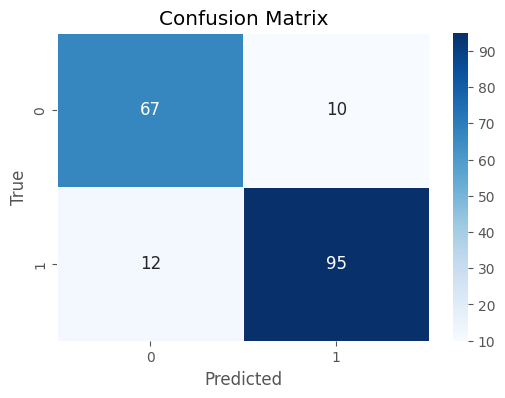

In [46]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

In [48]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate support (number of true instances for each class)
support_values = [np.sum(y_test == label) for label in np.unique(y_test)]

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)

accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Support: {support_values}')
print(f'ROC AUC: {roc_auc:.2f}')

Accuracy: 0.88
Precision: 0.90
Recall: 0.89
F1 Score: 0.90
Support: [77, 107]
ROC AUC: 0.94


In [56]:
df.head().style

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,1,140,289,0,172,0.000000,0,1,0,0,0,1,0,1,0,0,0,1
1,49,0,160,180,0,156,1.000000,0,0,1,0,0,1,0,1,0,0,1,0
2,37,1,130,283,0,98,0.000000,0,1,0,0,0,0,1,1,0,0,0,1
3,48,0,138,214,0,108,1.500000,1,0,0,0,0,1,0,0,1,0,1,0
4,54,1,150,195,0,122,0.000000,0,0,1,0,0,1,0,1,0,0,0,1


In [74]:
y_train.head()

795    0
25     0
84     1
10     0
344    1
Name: HeartDisease, dtype: int64

In [49]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [50]:
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

## Interpretation of Waterfall Graph of SHAP Values

E(x) => Expected value of the target variable \
f(x) => Predicted value of the model \
...(where x is any data point) \
Sum of all SHAP Values is E(x) - f(x) 


**The absolute SHAP value shows us how much a single feature affected the prediction**



### Analysis of 0th Example

Explaining 0th Example
Predicted Label : 0


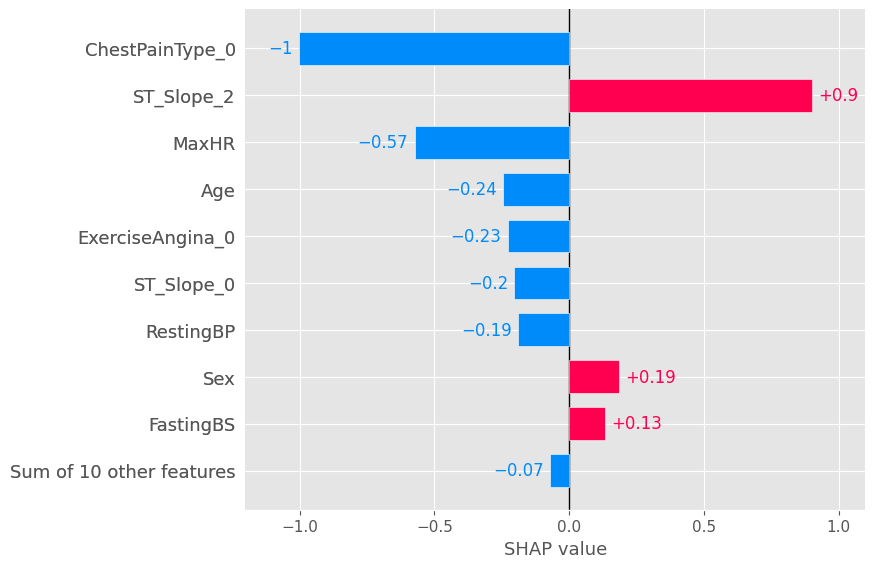

In [79]:
print(f"Explaining 0th Example\nPredicted Label : 0")
shap.plots.bar(shap_values[0])

### Analysis of 2nd Example

Explaining 0th Example
Predicted Label : 1


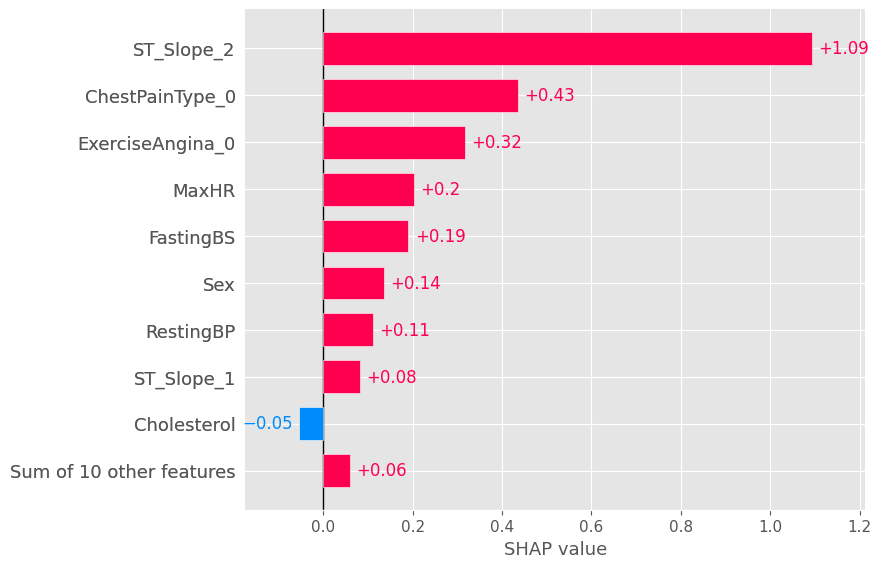

In [80]:
print(f"Explaining 0th Example\nPredicted Label : 1")
shap.plots.bar(shap_values[2])


### Global Explaination of the Model

### Beeswarm Plot

On the beeswarm the features are also ordered by their effect on prediction, but we can also see how higher and lower values of the feature will affect the result.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


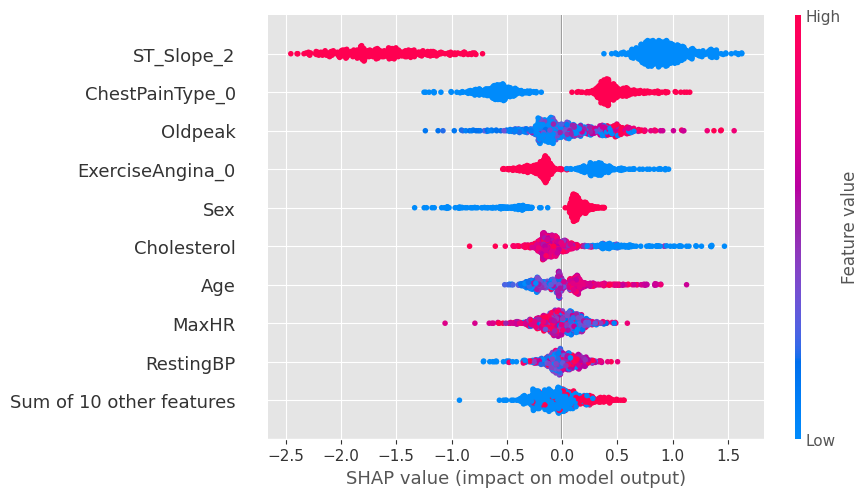

In [63]:
shap.plots.beeswarm(shap_values)

### Absolute Mean of SHAP values of features
**Here the features are ordered from the highest to the lowest effect on the prediction. It takes in account the absolute SHAP value, so it does not matter if the feature affects the prediction in a positive or negative way.**

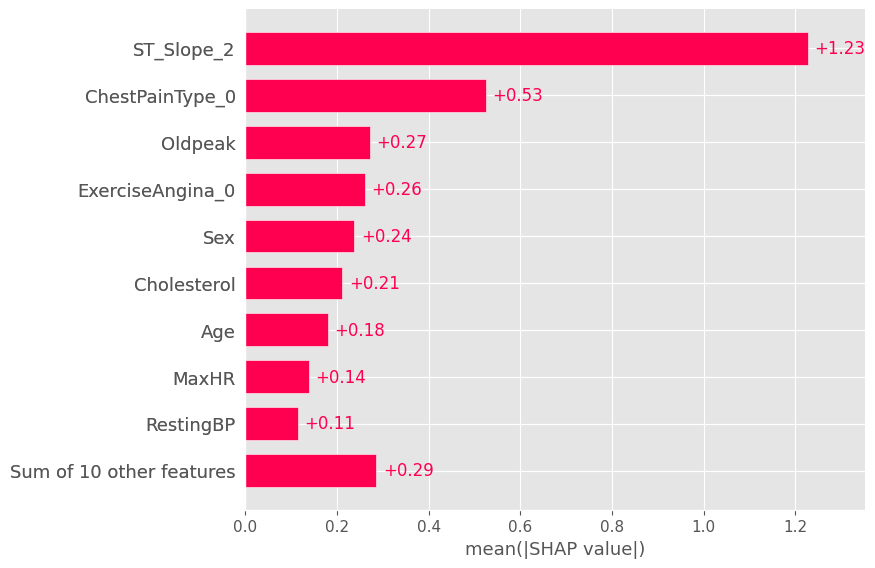

In [77]:
shap.plots.bar(shap_values)